<a href="https://colab.research.google.com/github/keerthana0316/Case-Judgement-Summarization/blob/main/LegalDocSummarizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#code

> importing the packages required

In [ ]:
!pip install transformers
!pip install datasets
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.8 MB/s eta 0:00:00


In [ ]:
import os
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertModel, Trainer, TrainingArguments
from datasets import load_dataset
from datasets import Dataset
import pandas as pd  # For creating the dataset

> Function to load data from specific file paths

In [ ]:
# Function to load data from a directory
def load_data(summary_dir, judgment_dir):
  summaries = []
  judgments = []
  for filename in os.listdir(summary_dir):
    summary_path = os.path.join(summary_dir, filename)
    judgment_path = os.path.join(judgment_dir, filename)  # Assuming filenames match

    with open(summary_path, 'r', encoding='utf-8') as f:
      summary = f.read()
    with open(judgment_path, 'r', encoding='utf-8') as f:
      judgment = f.read()

    summaries.append(summary)
    judgments.append(judgment)

  return judgments, summaries

In [ ]:
# Load data from directories
summary_dir = "/content/drive/MyDrive/dataset/IN-Ext/summary/full/A1"
judgment_dir = "/content/drive/MyDrive/dataset/IN-Ext/judgement"
judgments, summaries = load_data(summary_dir, judgment_dir)

In [ ]:
data = []
for judgment, summary in zip(judgments, summaries):
    inputs = tokenizer(judgment, truncation=True, padding="max_length")
    targets = tokenizer(summary, truncation=True, padding="max_length")
    data.append({"input_ids": inputs["input_ids"],
                  "attention_mask": inputs["attention_mask"],
                  "labels": targets["input_ids"],
                  "decoder_attention_mask": targets["attention_mask"]})

In [ ]:
# Create a dataset from the processed data (assuming data is in a pandas DataFrame)
df = pd.DataFrame(data)

In [ ]:
!pip install datasets
from datasets import Dataset

In [ ]:
dataset = Dataset.from_pandas(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   input_ids               50 non-null     object
 1   attention_mask          50 non-null     object
 2   labels                  50 non-null     object
 3   decoder_attention_mask  50 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


In [ ]:
df.isnull().sum()

,0
input_ids,0
attention_mask,0
labels,0
decoder_attention_mask,0


In [ ]:
df.head()

,input_ids,attention_mask,labels,decoder_attention_mask
0,"[386, 3095, 3958, 7, 6269, 51, 53, 45, 386, 14...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[377, 9262, 134, 386, 3095, 3958, 7, 6, 6269, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,"[8, 8319, 6761, 19, 3, 9, 2019, 84, 1114, 12, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[377, 9262, 134, 8, 8319, 6761, 19, 3, 9, 2019...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,"[8, 8319, 6761, 19, 3, 9, 349, 3, 10975, 365, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[377, 9262, 134, 8, 8319, 6761, 19, 3, 9, 349,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,"[823, 8, 8319, 6761, 270, 77, 11, 112, 2353, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[377, 9262, 134, 8, 8319, 6761, 7760, 12, 36, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,"[48, 3958, 19, 6640, 581, 8, 804, 7661, 11, 45...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[377, 9262, 134, 8, 8319, 6761, 18, 6004, 1006...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [ ]:
# Model Architecture
class SummarizationModel(nn.Module):
    def __init__(self, encoder_dim, decoder_dim, vocab_size, hidden_dim, num_layers, num_heads):
        super(SummarizationModel, self).__init__()
        self.encoder = BertModel.from_pretrained('bert-base-uncased')
        encoder_layer = nn.TransformerEncoderLayer(d_model=encoder_dim, nhead=num_heads, dim_feedforward=hidden_dim)
        encoder_norm = nn.LayerNorm(encoder_dim)
        self.encoder_layer = nn.TransformerEncoder(encoder_layer, num_layers, norm=encoder_norm)

        self.decoder = nn.TransformerDecoder(decoder_layer=nn.TransformerDecoderLayer(d_model=decoder_dim, nhead=num_heads, dim_feedforward=hidden_dim), num_layers=num_layers)
        self.linear = nn.Linear(decoder_dim, vocab_size)

    def forward(self, src, tgt, src_mask, tgt_mask):
        encoder_output = self.encoder(src, attention_mask=src_mask)
        decoder_output = self.decoder(tgt, src_key_padding_mask=src_mask, memory=encoder_output.last_hidden_state, tgt_mask=tgt_mask)
        output = self.linear(decoder_output)
        return output

# Model Initialization
model = SummarizationModel(encoder_dim=768, decoder_dim=768, vocab_size=len(tokenizer), hidden_dim=512, num_layers=6, num_heads=8)

# Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    save_steps=10_000,
    save_total_limit=2,

)

# ... other imports ...
from torch.utils.data import Dataset

# Assuming your dataset is a Pandas DataFrame named 'dataset'

class MyDataset(Dataset):
    def __init__(self, df):
        self.df = df
        self.input_ids = self.df['input_ids'].tolist()
        self.labels = self.df['labels'].tolist()

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # Return a dictionary with 'input_ids' and 'labels'
        # Ensure input_ids and labels are tensors
        return {
            'input_ids': torch.tensor(self.input_ids[idx]),
            'labels': torch.tensor(self.labels[idx]),
            'attention_mask': torch.tensor([1] * len(self.input_ids[idx])) # Add attention mask here
        }

# Create an instance of your custom dataset
train_ds = MyDataset(df)  # Pass your DataFrame 'df' here

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model),
    train_dataset=train_ds,
  # Use the created dataset here
)

# Train the Model
trainer.train()

# Save the Model
trainer.save_model("finetuned_model")

# Prediction
def generate_summary(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding="max_length")
    summary_ids = model.generate(inputs["input_ids"], attention_mask=inputs["attention_mask"], max_length=150, num_beams=4)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Example Usage
text = "This is a long text that I want to summarize."
summary = generate_summary(text)
print(summary)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


ValueError: You should supply an encoding or a list of encodings to this method that includes input_ids, but you provided []

#approach 2

In [ ]:
from google.colab import drive
drive.mount('MyDrive')

Mounted at MyDrive


In [ ]:
import os
import pandas as pd
from transformers import BertTokenizer, BertModel
import torch

# Define directories
summary_dir = "/content/MyDrive/MyDrive/dataset/IN-Ext/summary/full/A1"
judgment_dir = "/content/MyDrive/MyDrive/dataset/IN-Ext/judgement"

# Initialize lists to store data
judgments = []
summaries = []

# Function to read all text files in a directory
def read_files(directory):
    texts = {}
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            filepath = os.path.join(directory, filename)
            with open(filepath, 'r', encoding='utf-8') as file:
                texts[filename] = file.read()
    return texts

# Read judgment and summary texts
judgment_texts = read_files(judgment_dir)
summary_texts = read_files(summary_dir)

# Pair judgments and summaries based on filenames
for filename, judgment_text in judgment_texts.items():
    summary_text = summary_texts.get(filename, None)
    if summary_text:  # Only add pairs where both judgment and summary exist
        judgments.append(judgment_text)
        summaries.append(summary_text)

# Create DataFrame
df = pd.DataFrame({'judgment': judgments, 'summary': summaries})
print("DataFrame created with paired judgments and summaries.")

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to encode text with BERT
def encode_text(text):
    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding='max_length')
    outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].detach()  # CLS token embedding

# Apply BERT to each judgment and summary pair
df['judgment_embedding'] = df['judgment'].apply(encode_text)
df['summary_embedding'] = df['summary'].apply(encode_text)

# Display the DataFrame
print("BERT embeddings added to DataFrame.")
df.head()


DataFrame created with paired judgments and summaries.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BERT embeddings added to DataFrame.


,judgment,summary,judgment_embedding,summary_embedding
0,whether the appellant herein and his father ha...,FACTS\nthe appellant claimed to be the tenant ...,"[[tensor(-0.6994), tensor(0.0854), tensor(-0.2...","[[tensor(-0.9034), tensor(0.2404), tensor(-0.3..."
1,three civil appeals stemming from three revisi...,"FACTS\nthree civil appeals, stemming from thre...","[[tensor(-0.4797), tensor(0.1915), tensor(-0.5...","[[tensor(-0.6382), tensor(0.0948), tensor(-0.5..."
2,this appeal by special leave has been preferre...,"FACTS\ntata consultant engineers,was a partner...","[[tensor(-0.6683), tensor(-0.0480), tensor(-0....","[[tensor(-0.3062), tensor(0.0335), tensor(-0.1..."
3,this appeal with special leave is directed aga...,FACTS\nthis appeal with special leave is direc...,"[[tensor(-0.3057), tensor(-0.0640), tensor(-0....","[[tensor(-0.4691), tensor(-0.0021), tensor(-0...."
4,this appeal is by special leave against the ju...,FACTS\nit was the appellant's case that he had...,"[[tensor(-0.6445), tensor(0.2385), tensor(-0.6...","[[tensor(-0.5251), tensor(-0.0115), tensor(-0...."


In [ ]:
import pandas as pd
import nltk
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from datasets import Dataset

# Download necessary NLTK data
nltk.download('punkt')

# Define directories and load the DataFrame
summary_dir = "/content/drive/MyDrive/dataset/IN-Ext/summary/full/A1"
judgment_dir = "/content/drive/MyDrive/dataset/IN-Ext/judgement"

# Sample dataframe created based on previous steps
# Assuming `df` already exists with `judgment` and `summary` columns

# Function to create labeled data for extractive summarization
def label_sentences(judgment, summary):
    judgment_sentences = nltk.sent_tokenize(judgment)
    summary_sentences = set(nltk.sent_tokenize(summary))  # To match exactly

    # Label each sentence in the judgment as 1 if it exists in the summary, otherwise 0
    labeled_data = []
    for sentence in judgment_sentences:
        label = 1 if sentence in summary_sentences else 0
        labeled_data.append({'sentence': sentence, 'label': label})
    return labeled_data

# Prepare data for BERT fine-tuning
labeled_sentences = []
for _, row in df.iterrows():
    labeled_sentences.extend(label_sentences(row['judgment'], row['summary']))

# Convert to DataFrame for easy handling
labeled_df = pd.DataFrame(labeled_sentences)

# Split into train and test sets
train_df, test_df = train_test_split(labeled_df, test_size=0.2, random_state=42)

# Load tokenizer and BERT model for classification
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Tokenization function
def tokenize(batch):
    return tokenizer(batch['sentence'], padding='max_length', truncation=True, max_length=512)

# Convert to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_df).map(tokenize, batched=True)
test_dataset = Dataset.from_pandas(test_df).map(tokenize, batched=True)

# Set format for PyTorch tensors
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    save_steps=10_000,
    save_total_limit=2,
    logging_dir='./logs',
)

# Trainer instance
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Train the model
trainer.train()

# Apply the model to generate extractive summaries
def extractive_summary(judgment_text):
    sentences = nltk.sent_tokenize(judgment_text)
    inputs = tokenizer(sentences, return_tensors='pt', padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=1)

    # Select sentences labeled as part of the summary (label 1)
    summary = ' '.join([sent for sent, pred in zip(sentences, predictions) if pred == 1])
    return summary

# Example usage on a new judgment
df['extractive_summary'] = df['judgment'].apply(extractive_summary)

print(df[['judgment', 'extractive_summary']].head())


ModuleNotFoundError: No module named 'datasets'

#Final Code

In [ ]:
# Install Hugging Face Transformers and Datasets libraries
!pip install transformers datasets
!pip install nltk wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
# Import necessary libraries
import os
import pandas as pd
import nltk
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
# Download NLTK punkt tokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import PunktSentenceTokenizer

# Training text
training_text = "Dr. Smith is a renowned scientist. She lives in the U.S.A. Her research is groundbreaking!"

# Initialize and train Punkt
tokenizer = PunktSentenceTokenizer()

# Tokenize a new text
new_text = "Keerthana is always late. Hope this will be done! We need to finish this asap."
sentences = tokenizer.tokenize(new_text)

print(sentences)

['Keerthana is always late.', 'Hope this will be done!', 'We need to finish this asap.']


In [ ]:
#mount drive for the dataset
from google.colab import drive
drive.mount('MyDrive')

Drive already mounted at MyDrive; to attempt to forcibly remount, call drive.mount("MyDrive", force_remount=True).


In [ ]:
# Define directories for judgment and summary text files
summary_dir = "/content/MyDrive/MyDrive/dataset/IN-Ext/summary/full/A1"
judgment_dir = "/content/MyDrive/MyDrive/dataset/IN-Ext/judgement"

In [ ]:
# Initialize lists to store text data
judgments = []
summaries = []

In [ ]:
# Function to read all text files in a directory
def read_files(directory):
    texts = {}
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            filepath = os.path.join(directory, filename)
            with open(filepath, 'r', encoding='utf-8') as file:
                texts[filename] = file.read()
    return texts

In [ ]:
# Load text files into dictionaries
judgment_texts = read_files(judgment_dir)
summary_texts = read_files(summary_dir)

In [ ]:
# Pair judgments and summaries by filename
for filename, judgment_text in judgment_texts.items():
    summary_text = summary_texts.get(filename, None)
    if summary_text:  # Only keep pairs where both files exist
        judgments.append(judgment_text)
        summaries.append(summary_text)

In [ ]:
# Create DataFrame
df = pd.DataFrame({'judgment': judgments, 'summary': summaries})
print("DataFrame created with paired judgments and summaries.")
df.head()

DataFrame created with paired judgments and summaries.


,judgment,summary
0,whether the appellant herein and his father ha...,FACTS\nthe appellant claimed to be the tenant ...
1,three civil appeals stemming from three revisi...,"FACTS\nthree civil appeals, stemming from thre..."
2,this appeal by special leave has been preferre...,"FACTS\ntata consultant engineers,was a partner..."
3,this appeal with special leave is directed aga...,FACTS\nthis appeal with special leave is direc...
4,this appeal is by special leave against the ju...,FACTS\nit was the appellant's case that he had...


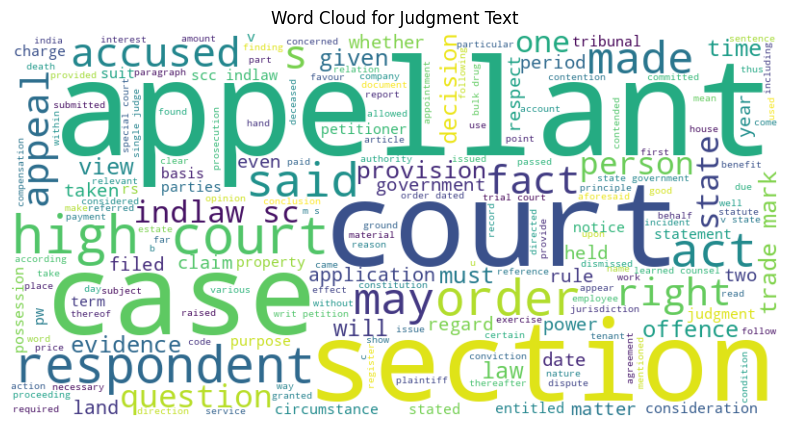

In [ ]:
# Word Cloud for Judgment Text
judgment_text = " ".join(df['judgment'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(judgment_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Judgment Text")
plt.show()

In [ ]:
# Label sentences from judgment based on presence in summary
def label_sentences(judgment, summary):
    judgment_sentences = nltk.sent_tokenize(judgment)
    summary_sentences = set(nltk.sent_tokenize(summary))  # Exact matches for labeling

    labeled_data = []
    for sentence in judgment_sentences:
        label = 1 if sentence in summary_sentences else 0
        labeled_data.append({'sentence': sentence, 'label': label})
    return labeled_data

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Apply labeling to entire dataset
labeled_sentences = []
for _, row in df.iterrows():
    labeled_sentences.extend(label_sentences(row['judgment'], row['summary']))

In [ ]:
# Convert labeled data into DataFrame
labeled_df = pd.DataFrame(labeled_sentences)
print("Labeled Data Sample:", labeled_df.head())

Labeled Data Sample:                                             sentence  label
0  whether the appellant herein and his father ha...      0
1  hereinafter called the rent act is the questio...      0
2  in order to decide this question it is necessa...      0
3          to decide this facts must be referred to.      0
4  the appellant claimed to be the tenant in resp...      0


In [ ]:
# Split labeled data into train and test sets
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(labeled_df, test_size=0.2, random_state=42)

In [ ]:
# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
# Tokenization function
def tokenize(batch):
    return tokenizer(batch['sentence'], padding='max_length', truncation=True, max_length=512)

In [ ]:
# Convert to Hugging Face Dataset and tokenize
train_dataset = Dataset.from_pandas(train_df).map(tokenize, batched=True)
test_dataset = Dataset.from_pandas(test_df).map(tokenize, batched=True)

Map:   0%|          | 0/6427 [00:00<?, ? examples/s]

Map:   0%|          | 0/1607 [00:00<?, ? examples/s]

In [ ]:
# Set PyTorch format
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

In [ ]:
# Load BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Define training arguments
training_args = TrainingArguments(output_dir='./results',
    eval_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    save_steps=10_000,
    logging_dir='./logs')

In [ ]:
# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=lambda p: {'accuracy': accuracy_score(p.label_ids, p.predictions.argmax(-1))}
)

In [ ]:
# Train the model
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss


In [ ]:
# Function to generate extractive summaries
def extractive_summary(judgment_text):
    sentences = nltk.sent_tokenize(judgment_text)
    inputs = tokenizer(sentences, return_tensors='pt', padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=1)

    # Select sentences labeled as part of the summary (label 1)
    summary = ' '.join([sent for sent, pred in zip(sentences, predictions) if pred == 1])
    return summary

# Apply model on test data for evaluation
test_df['predicted_summary'] = test_df['sentence'].apply(extractive_summary)
print("Sample Extractive Summary Results:", test_df[['sentence', 'predicted_summary']].head())

In [ ]:
# Generate classification report
y_true = test_df['label'].tolist()
y_pred = [1 if s in test_df['predicted_summary'].tolist() else 0 for s in test_df['sentence'].tolist()]
print("Classification Report:\n", classification_report(y_true, y_pred))

In [ ]:
# Word Cloud for Summary Text
summary_text = " ".join(df['summary'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Summary Text")
plt.show()